# Airline Analysis

In this project, I am exploring data relating to airline ticket prices.

The data includes:
- `miles`: miles traveled through the flight
- `passengers`: number of passengers on the flight
- `delay`: take-off delay in minutes
- `inflight_meal`: is there a meal included in the flight?
- `inflight_entertainment`: are there free entertainment systems for each seat?
- `inflight_wifi`: is there complimentary wifi on the flight?
- `day_of_week`: day of the week of the flight
- `weekend`: did this flight take place on a weekend?
- `coach_price`: the average price paid for a coach ticket
- `firstclass_price`: the average price paid for first-class seats
- `hours`: how many hours the flight took
- `redeye`: was this flight a redeye (overnight)?

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

## Read in Data
flight = pd.read_csv("flight.csv")
print(flight.head())


flight.describe()

   miles  passengers  delay inflight_meal inflight_entertainment  \
0    792         172      0            No                    Yes   
1   3163         214      0            No                    Yes   
2   1832         212      0            No                    Yes   
3    925         213      0            No                    Yes   
4    967         217      0           Yes                    Yes   

  inflight_wifi day_of_week redeye weekend  coach_price  firstclass_price  \
0           Yes      Sunday    Yes     Yes      338.820           1571.02   
1           Yes      Sunday     No     Yes      472.655           1663.70   
2            No      Friday     No     Yes      351.960           1429.86   
3           Yes    Saturday     No     Yes      387.835           1558.76   
4           Yes      Monday     No      No      374.735           1245.58   

   hours  
0      1  
1      6  
2      3  
3      2  
4      2  


,miles,passengers,delay,coach_price,firstclass_price,hours
count,129780.000000,129780.000000,129780.000000,129780.000000,129780.000000,129780.000000
mean,2006.224696,207.723155,13.162845,376.585253,1454.931785,3.631214
std,943.034768,12.776363,41.941680,67.744274,162.590434,1.739118
min,12.000000,135.000000,0.000000,44.415000,939.100000,1.000000
25%,1343.000000,204.000000,9.000000,331.445000,1302.200000,2.000000
50%,1986.000000,210.000000,10.000000,380.560000,1503.840000,4.000000
75%,2468.000000,215.000000,13.000000,426.676250,1582.370000,4.000000
max,4548.000000,244.000000,1560.000000,593.635000,1846.780000,8.000000


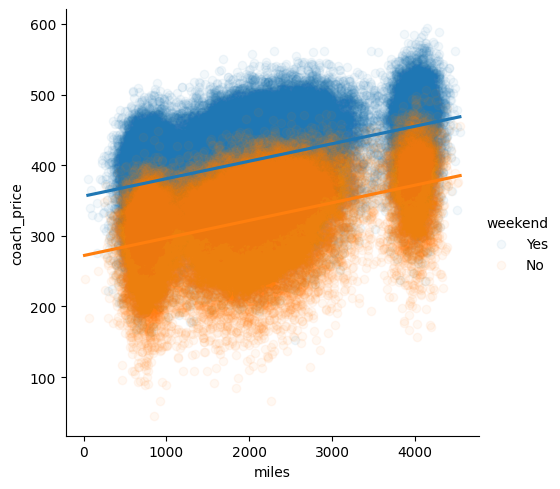

<Figure size 640x480 with 0 Axes>

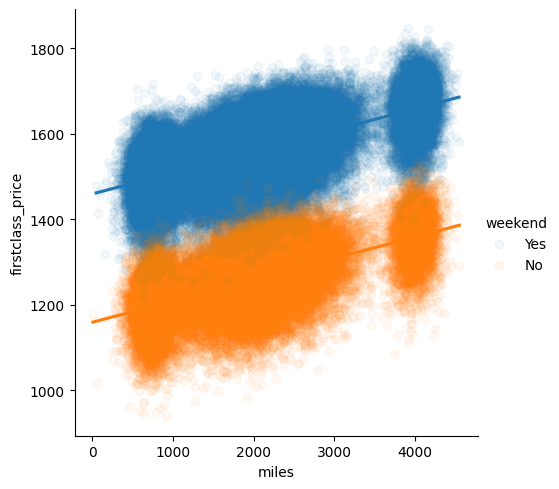

<Figure size 640x480 with 0 Axes>

In [122]:
sns.lmplot(x='miles', y='coach_price', data=flight, scatter_kws={'alpha':0.05}, hue='weekend')
plt.show()
plt.clf()

sns.lmplot(x='miles', y='firstclass_price', data=flight, scatter_kws={'alpha':0.05}, hue='weekend')
plt.show()
plt.clf()

There is a positive relationship between the miles traveled and the price of a ticket, but there is significant variation. After adding in weekend to the data, it seems that a large portion of the variation is a result of differences in price due to the day of the week. I assume this is due to higher demand for weekend flights.<br><br>
First class in particular shows a large difference.

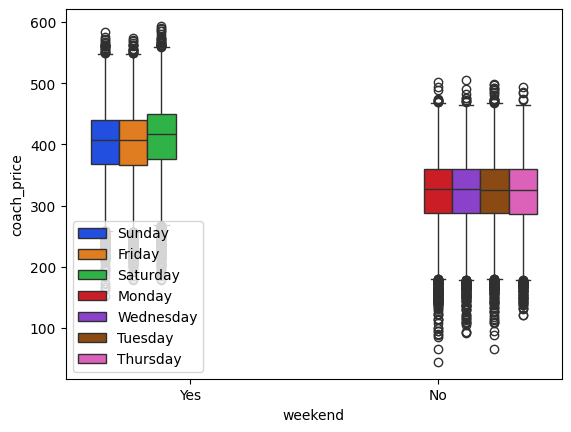

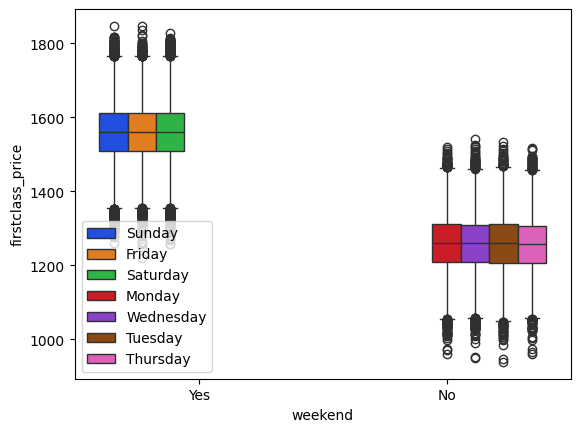

<Figure size 640x480 with 0 Axes>

In [118]:
## Task 1
sns.boxplot(x='weekend', y='coach_price', palette='bright', hue='day_of_week', data=flight)
plt.legend(loc=3)
plt.show()
plt.clf()

sns.boxplot(x='weekend', y='firstclass_price', palette='bright', hue='day_of_week', data=flight)
plt.legend(loc=3)
plt.show()
plt.clf()

Prices on weekends are significantly higher, particularly for first class.

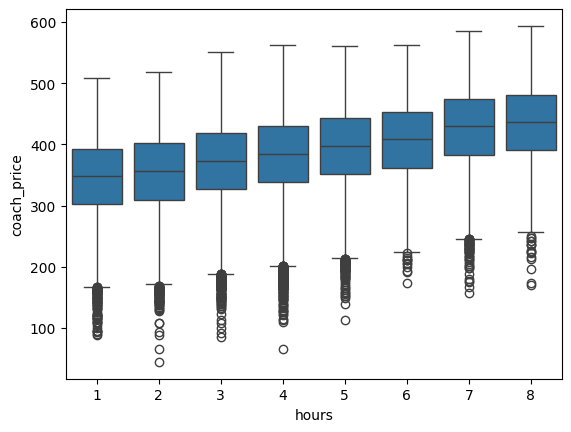

,miles,passengers,delay,coach_price,firstclass_price,hours
count,2634.000000,2634.000000,2634.000000,2634.000000,2634.000000,2634.0
mean,4207.205771,207.270691,14.167426,431.834377,1571.496572,8.0
std,69.083475,13.098447,57.863457,64.083280,153.833271,0.0
min,4125.000000,148.000000,0.000000,170.770000,1128.770000,8.0
25%,4154.000000,203.000000,9.000000,390.266250,1415.645000,8.0
50%,4190.000000,209.000000,10.000000,437.115000,1632.905000,8.0
75%,4243.000000,215.000000,13.000000,480.043750,1693.000000,8.0
max,4548.000000,233.000000,1509.000000,593.635000,1846.140000,8.0


<Figure size 640x480 with 0 Axes>

In [36]:
## Task 2
sns.boxplot(y='coach_price', x='hours', data=flight)
plt.show()
plt.clf()

flight[flight.hours == 8].describe()

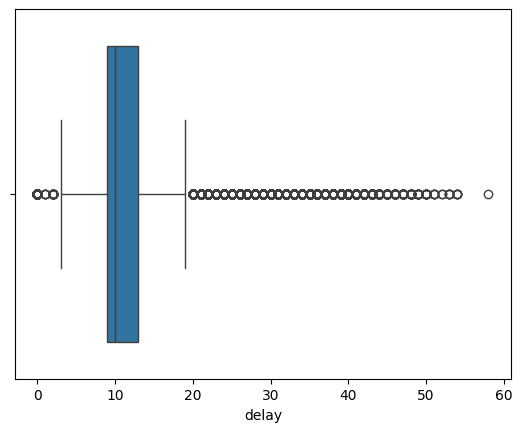

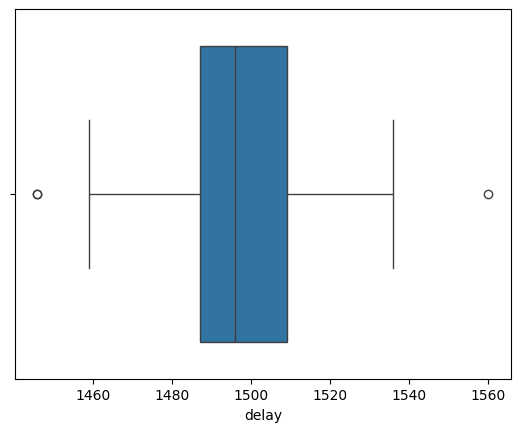

<Figure size 640x480 with 0 Axes>

In [28]:
## Task 3
sns.boxplot(x='delay', data=flight[flight.delay < 400])
plt.show()
plt.clf()

sns.boxplot(x='delay', data=flight[flight.delay > 400])
plt.show()
plt.clf()

Large delays (>60) make up less than a percent of delays. 99.9% of delays are less than 60 minutes, with most (86%) being less than 20 minutes.

In [40]:
less_20 = len(flight[flight.delay < 20])/len(flight)
less_60 = len(flight[flight.delay < 60])/len(flight)
great_60 = len(flight[flight.delay > 60])/len(flight)
great_60_avg = flight[flight.delay > 60].delay.mean()

print(less_20)
print(less_60, great_60)
print(great_60_avg)

0.8595238095238096
0.9992294652488827 0.0007705347511172754
1497.11


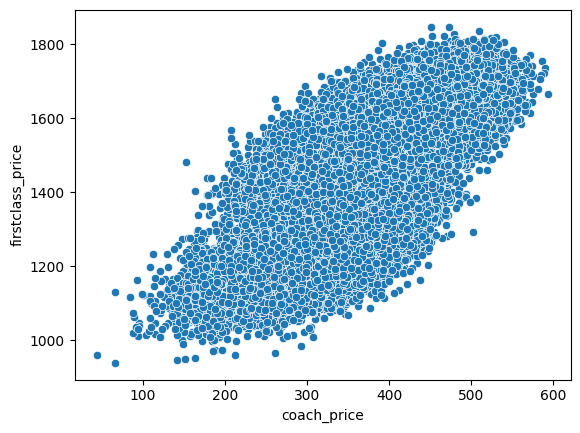

<Figure size 640x480 with 0 Axes>

In [44]:
## Task 4
sns.scatterplot(x='coach_price', y='firstclass_price', data=flight)
plt.show()
plt.clf()


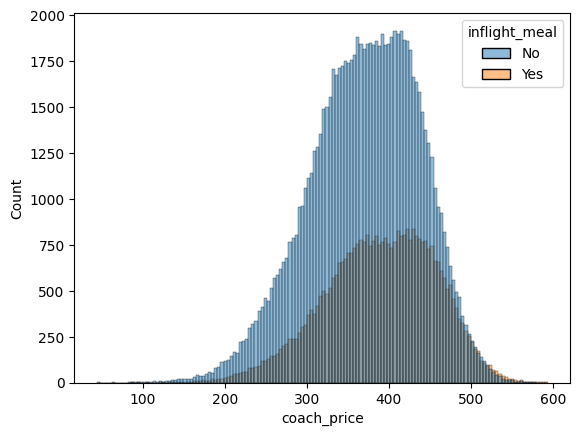

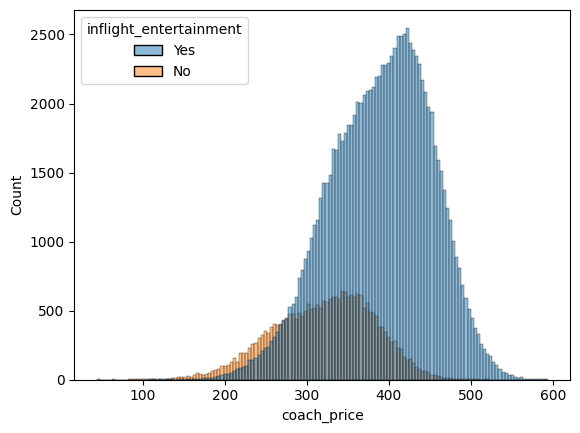

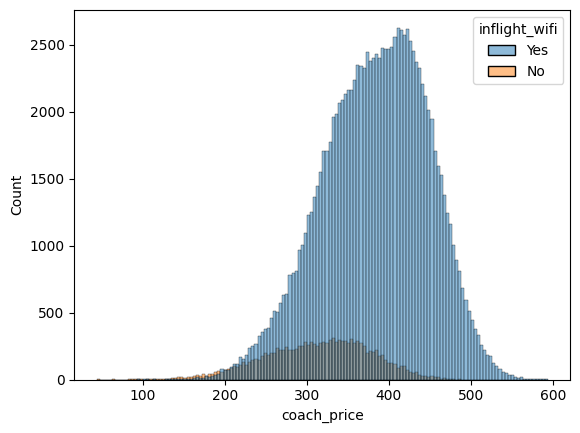

<Figure size 640x480 with 0 Axes>

In [50]:
## Task 5
sns.histplot(flight, x='coach_price', hue='inflight_meal', alpha=0.5)
plt.show()
plt.clf()

sns.histplot(flight, x='coach_price', hue='inflight_entertainment', alpha=0.5)
plt.show()
plt.clf()

sns.histplot(flight, x='coach_price', hue='inflight_wifi', alpha=0.5)
plt.show()
plt.clf()

In [58]:
print("Amount with inflight meal:          " + str(flight[flight.inflight_meal == 'Yes'].inflight_meal.count()/len(flight)))
print("Amount with inflight entertainment: " + str(flight[flight.inflight_entertainment == 'Yes'].inflight_entertainment.count()/len(flight)))
print("Amount with inflight wifi:          " + str(flight[flight.inflight_wifi == 'Yes'].inflight_entertainment.count()/len(flight)))

Amount with inflight meal:          0.3002542764678687
Amount with inflight entertainment: 0.8015718908922792
Amount with inflight wifi:          0.8997226074895978


In [62]:
overall_mean = flight.coach_price.mean()
print("Price difference with inflight meal:          " + str(flight[flight.inflight_meal == 'Yes'].coach_price.mean() - flight[flight.inflight_meal == 'No'].coach_price.mean()))
print("Price difference with inflight entertainment: " + str(flight[flight.inflight_entertainment == 'Yes'].coach_price.mean() - flight[flight.inflight_entertainment == 'No'].coach_price.mean()))
print("Price difference with inflight wifi:          " + str(flight[flight.inflight_wifi == 'Yes'].coach_price.mean()- flight[flight.inflight_wifi == 'No'].coach_price.mean()))

Price difference with inflight meal:          19.31352129718823
Price difference with inflight entertainment: 70.06515472358234
Price difference with inflight wifi:          70.46574876514734


Of the inflight features (meal, entertainment, wifi), inflight entertainment & wifi had the largest impact on ticket price for coach tickets. <br>
This is evidence by the mean difference in price with and without, and also by the histogram means for with and without each of these features. The mean for 'Yes' & 'No for inflight meal were almost the same.<br><br>
Inflight wifi is the most common feature.

6. How does the number of passengers change in relation to the length of flights?

In [82]:
pass_by_duration = flight.groupby(flight.hours).passengers.sum()
print(pass_by_duration)
print(pass_by_duration.index)

hours
1    3611426
2    3316049
3    5648876
4    7726003
5    3413332
6     525086
7    2171588
8     545951
Name: passengers, dtype: int64
Index([1, 2, 3, 4, 5, 6, 7, 8], dtype='int64', name='hours')


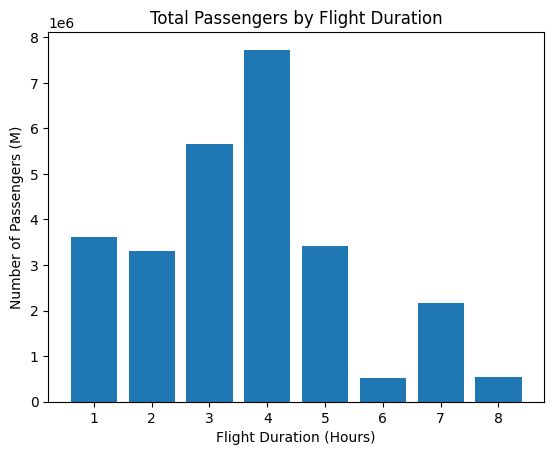

<Figure size 640x480 with 0 Axes>

In [88]:
## Task 6
plt.bar(range(len(pass_by_duration)), pass_by_duration, )
#sns.countplot(pass_by_duration)
ax = plt.subplot(1,1,1)
ax.set_xticks(range(len(pass_by_duration)))
ax.set_xticklabels(pass_by_duration.index)
plt.xlabel('Flight Duration (Hours)')
plt.ylabel('Number of Passengers (M)')
plt.title('Total Passengers by Flight Duration')
plt.show()
plt.clf()

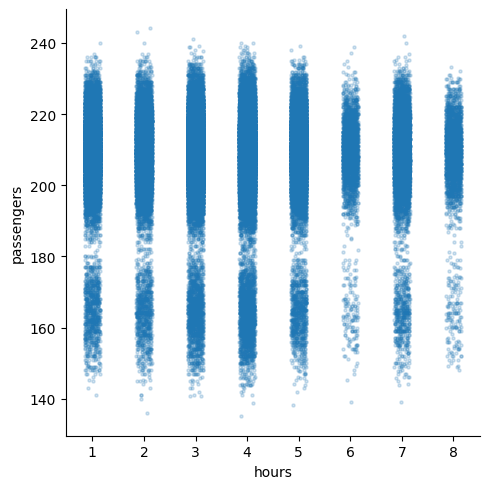

<Figure size 640x480 with 0 Axes>

In [94]:
sns.lmplot(x='hours', y ='passengers', data=flight, fit_reg=False, x_jitter=0.15, y_jitter=0.15, scatter_kws={'s':5, 'alpha':0.2})
plt.show()
plt.clf()

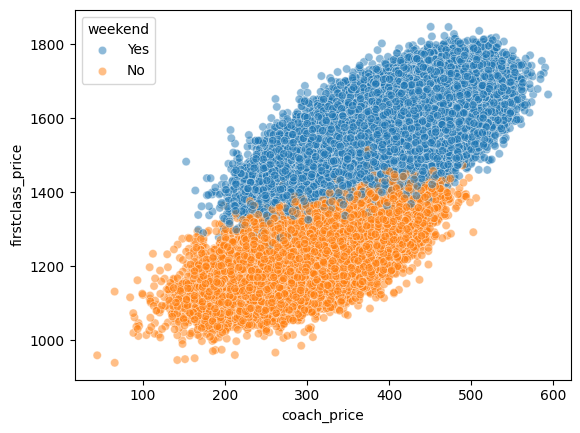

<Figure size 640x480 with 0 Axes>

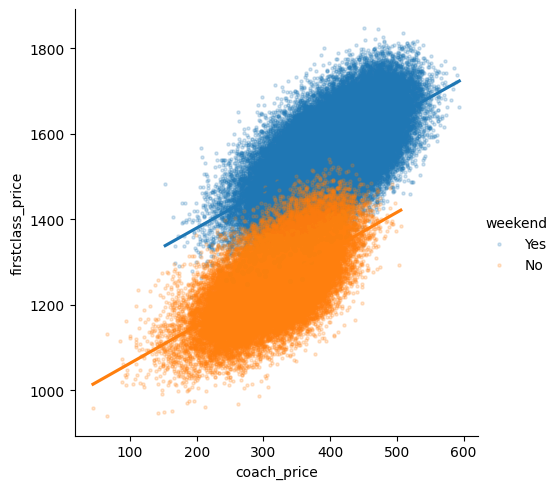

<Figure size 640x480 with 0 Axes>

In [103]:
## Task 7
sns.scatterplot(x='coach_price', y='firstclass_price', data=flight, hue='weekend', alpha=0.5)
plt.show()
plt.clf()


8. How do coach prices differ for redeyes and non-redeyes on each day of the week?

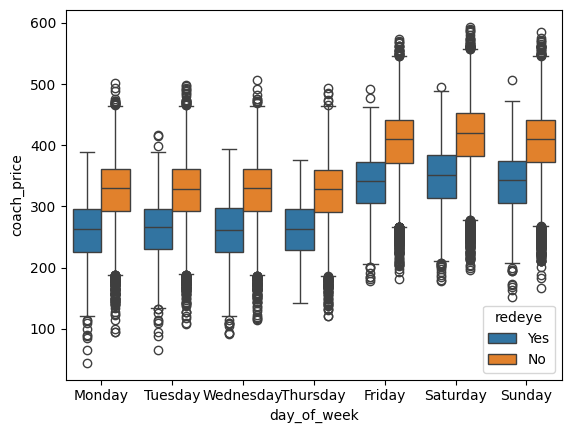

<Figure size 640x480 with 0 Axes>

In [110]:
## Task 8
ord_l = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.boxplot(x='day_of_week', y='coach_price', data=flight, hue='redeye', order=ord_l)
plt.show()
plt.clf()

In [113]:
flight.groupby(['day_of_week','redeye']).coach_price.describe()

count        mean        std      min        25%  \
day_of_week redeye                                                       
Friday      No      21450.0  405.001369  52.754500  180.630  371.61625   
            Yes      1159.0  337.155928  50.949138  178.050  304.95250   
Monday      No      13402.0  325.120314  52.157790   94.535  292.45500   
            Yes       663.0  258.335271  55.148240   44.415  225.90750   
Saturday    No      32016.0  415.460401  52.598673  195.310  382.00875   
            Yes      1720.0  347.454782  51.783982  177.965  313.94625   
Sunday      No      26880.0  405.290714  52.327262  167.425  371.85500   
            Yes      1418.0  339.015085  51.152904  152.745  306.36625   
Thursday    No       8069.0  324.011555  52.666237  121.270  290.85000   
            Yes       391.0  261.606944  48.646271  142.460  228.87000   
Tuesday     No      10833.0  324.718128  52.845923  108.290  292.14000   
            Yes       558.0  262.127115  52.374627   65.720  231.13500   
Wednesday   No      10684.0  325.125197  52.570632  114.710  291.93500   
            Yes       537.0  257.725428  55.332382   92.140  224.86500   

                         50%        75%      max  
day_of_week redeye                                
Friday      No      409.5275  441.45500  573.460  
            Yes     342.1650  373.25000  491.145  
Monday      No      329.7325  361.74250  502.525  
            Yes     262.3600  296.02000  388.435  
Saturday    No      419.5850  451.92500  593.635  
            Yes     351.9450  384.72750  494.800  
Sunday      No      409.4025  441.47500  584.325  
            Yes     343.9075  374.64500  506.020  
Thursday    No      327.8900  360.33500  493.870  
            Yes     263.2750  295.95000  375.690  
Tuesday     No      328.7900  361.19000  498.580  
            Yes     267.0375  296.25625  416.680  
Wednesday   No      330.0450  361.69375  505.925  
            Yes     260.7200  297.56500  393.370